In [2]:
import numpy as np
import matplotlib.pyplot as plt
import json

In [4]:
with open(r"C:\Users\Tim Huang\ATdistances.json") as f:
    data  = json.load(f)
    
data_0 = data['0']

In [10]:
def make_pdf(data, nbins):
    data = sorted(data)
    increment = data[-1]/nbins
    binNum = 0
    pdf = np.array([0] * (nbins + 1)) #due to float percision sometimes you need one extra bin
    midpoints = []
    
    
    i = 0
    while i < len(data):
        #if data[i] == 0:
         #   print('woah zero')
        if data[i] <= (binNum + 1)* increment:
            pdf[binNum] += 1
            i += 1
        else:
            midpoints.append(((binNum * increment) + ((binNum + 1) * increment))/2)
            binNum += 1
        
    midpoints.append(((binNum * increment) + ((binNum + 1) * increment))/2) # have to do one more time outside loop
    
    #recombine the extra bin
    
    pdf[-2] += pdf[-1]
    
    pdf = pdf[0:-1]
    
    return midpoints, pdf/len(data)

def make_cdf(data):
    cdf = []
    x = []
    data = sorted(data)
    for i in range(len(data)):
        x.append(data[i])
        cdf.append(i+1)
        
    return np.asarray(x), np.asarray(cdf)/len(data)

In [17]:
def expofit(data, buckets = 10, display = True, cdf = False, verbose = False, start_factor = 2):
    
    fig, host = plt.subplots()
    par1 = host.twinx()
    values, bins, _ = host.hist(data, bins = buckets)
    
#     plt.clf()
    i = 1
    peak = values[0]
    while (values[i] > peak): #get beyond first peak
        peak = values[i]
        i += 1
    
    beta = 1
    factor = start_factor
    while(factor > 1):
        to_print = "beta, factor: {} {}\n".format(beta, factor) if verbose else ''
        print(to_print, end = '')
        total = 0;
        for t in range(i, buckets):
#             print(-bins[t-1]/beta + np.log(values[t]), values[t])
            total += -bins[t-1]/beta + np.log(values[t]) if values[t] != 0 else 0
#         print(total)
        if (total > 0):
            beta /= factor;
        elif (total < 0):
            beta *= factor;
        else:
            break
        factor /= 1.01
    to_print = "Final guess of beta is: {}\n".format(beta) if verbose else ''
    print(to_print, end = '')
    x = np.asarray(np.linspace(0, bins[-1], 100))
    if display:
#         print(x, bins[-1])
#         print(np.exp(-x/beta)/beta)
        y = np.exp(-x/beta)/beta
        p1 = par1.plot(x, y/np.max(y), c = "orange")
        
        plt.show()
    else:
        plt.clf()
    if cdf:
        x_1, y_1 = make_cdf(data)
        
        plt.plot(x_1, y_1)
        
        plt.plot(x, 1 - np.exp((-1/beta) * x))
        plt.show()

For class 0:


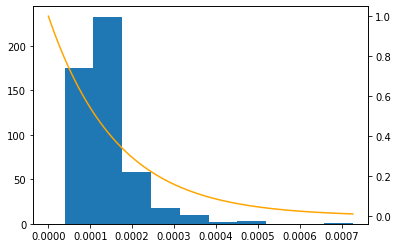

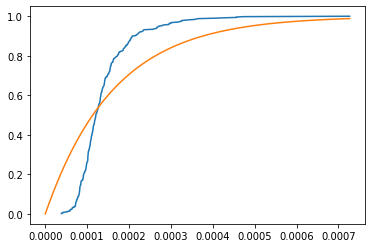

For class 1:


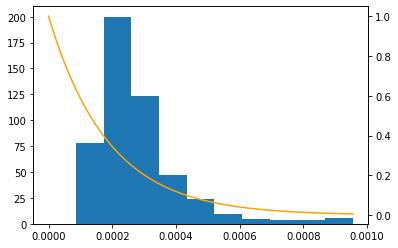

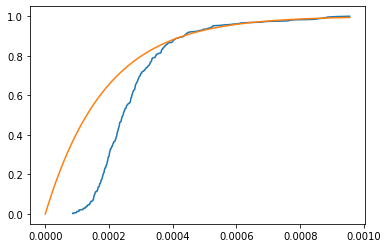

For class 2:


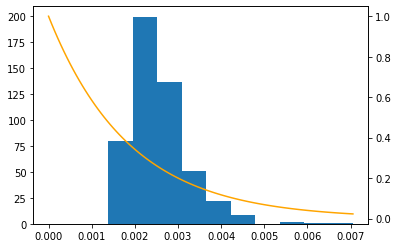

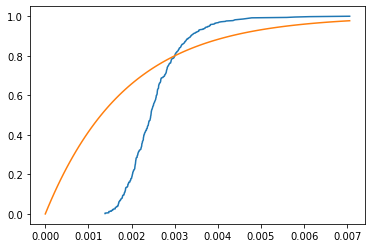

For class 3:


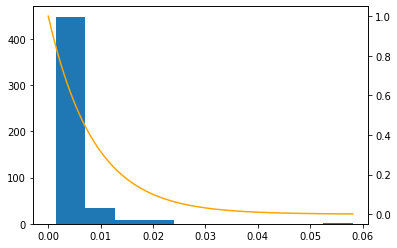

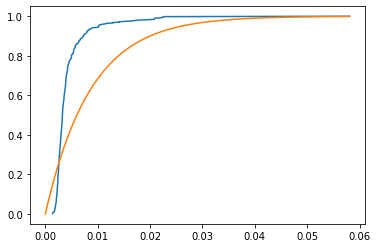

For class 4:


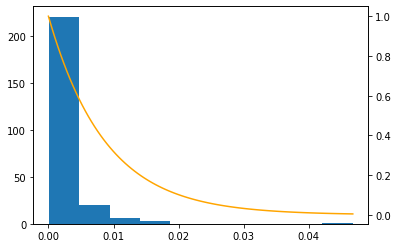

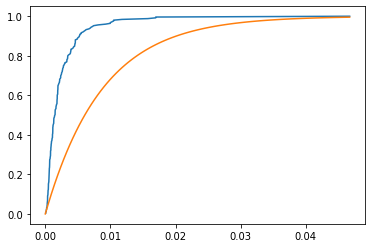

For class 5:


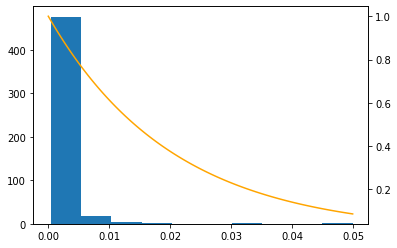

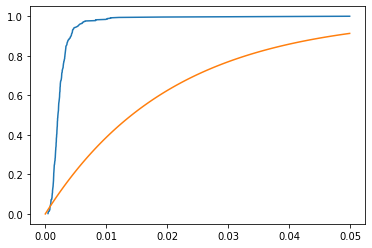

For class 6:


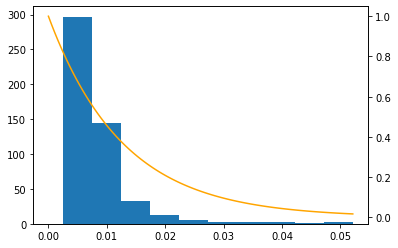

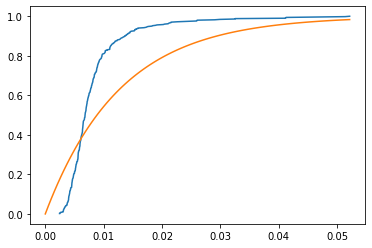

For class 7:


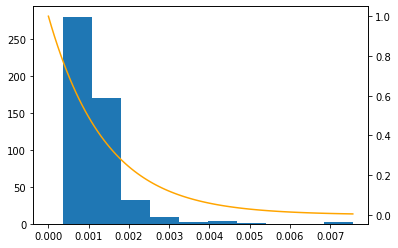

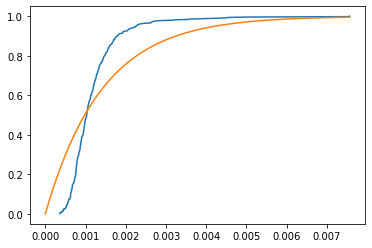

In [127]:
# print(data_0)
#expofit(data_0["0"],display = False, cdf = True)

for i in data:
    print("For class "+ i + ":")
    expofit(data[i][i], cdf = True)


For class 0 in species AT:


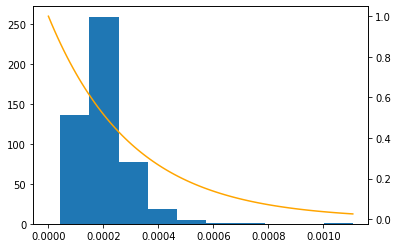

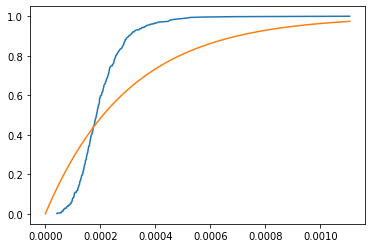

For class 1 in species AT:


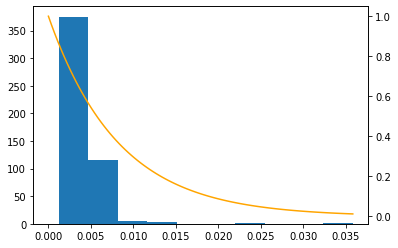

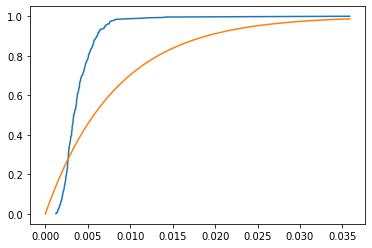

For class 2 in species AT:


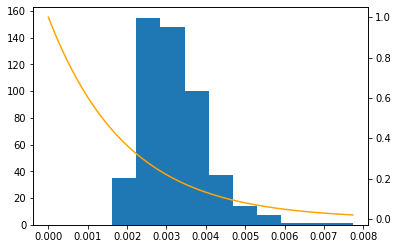

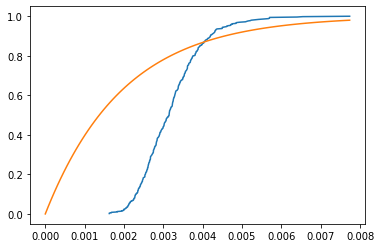

For class 3 in species AT:


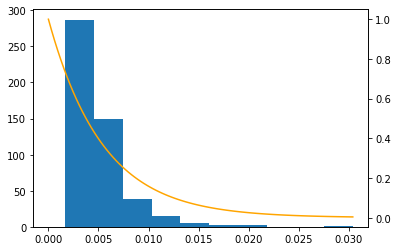

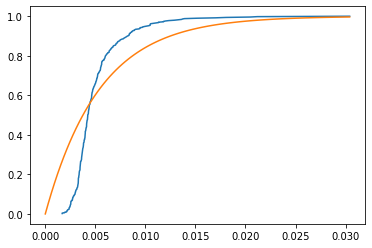

For class 4 in species AT:


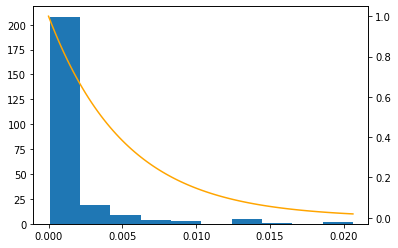

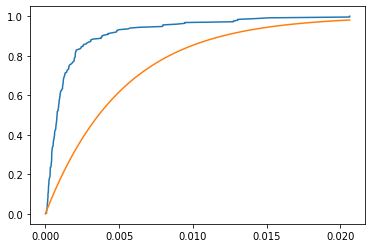

For class 5 in species AT:


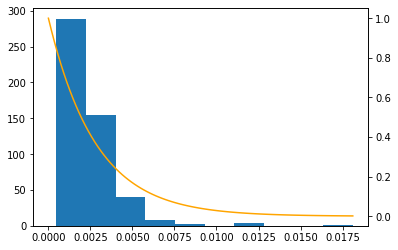

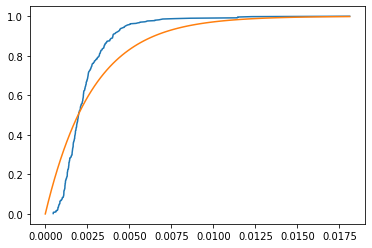

For class 6 in species AT:


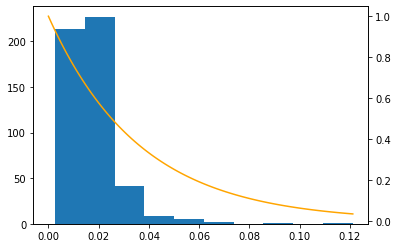

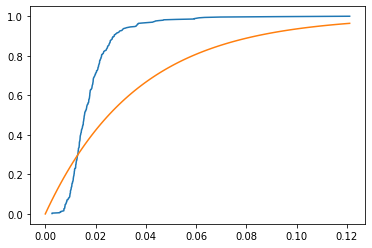

For class 7 in species AT:


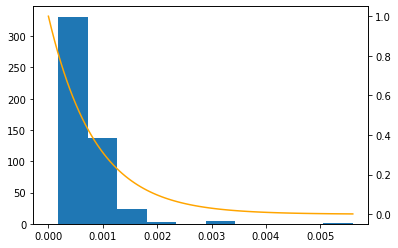

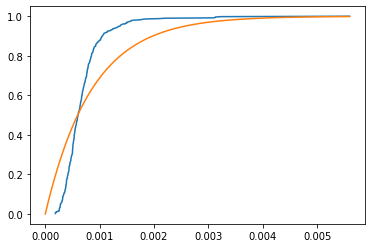

For class 0 in species CE:


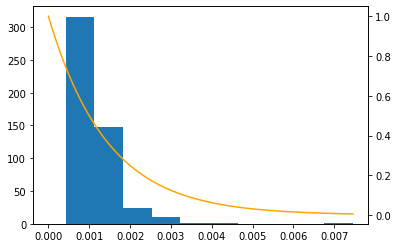

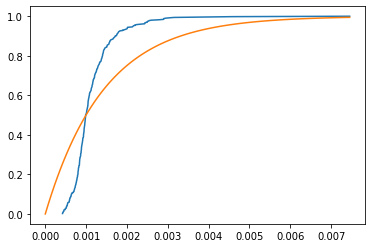

For class 1 in species CE:


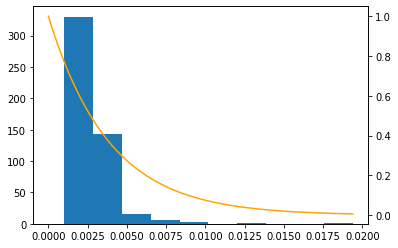

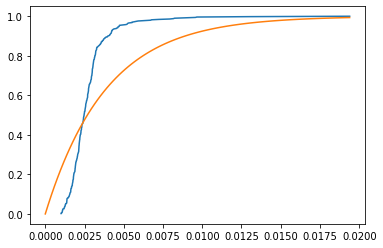

For class 2 in species CE:


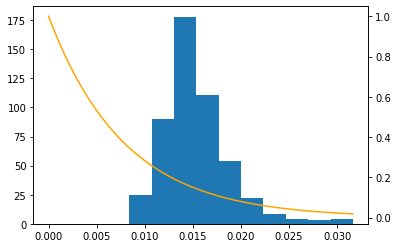

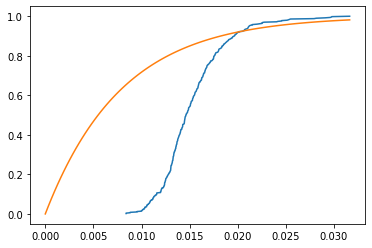

For class 3 in species CE:


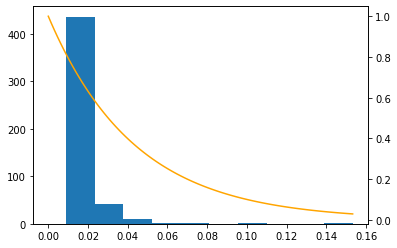

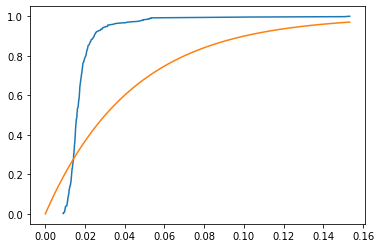

For class 4 in species CE:


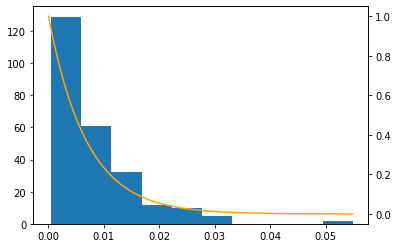

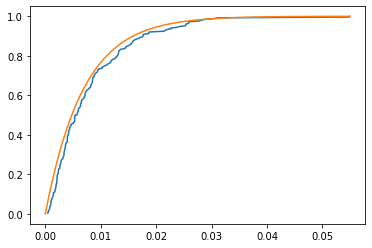

For class 5 in species CE:


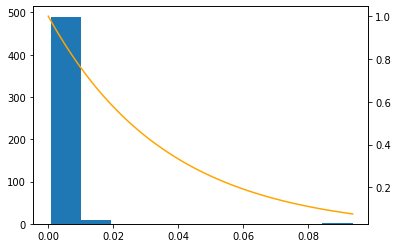

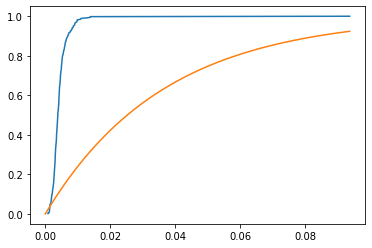

For class 6 in species CE:


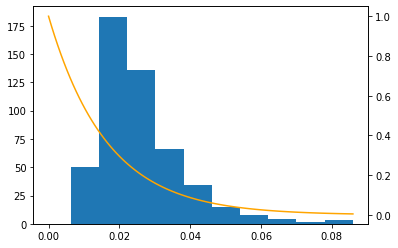

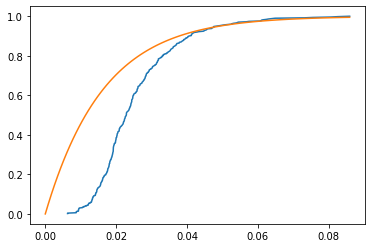

For class 7 in species CE:


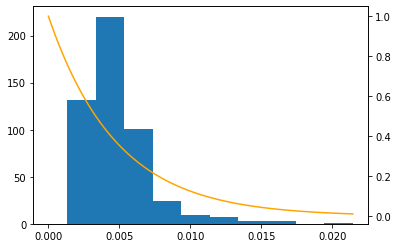

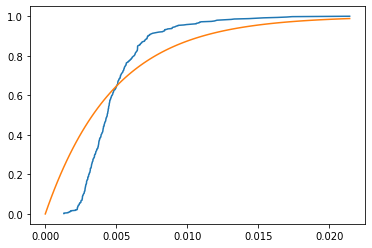

For class 0 in species DM:


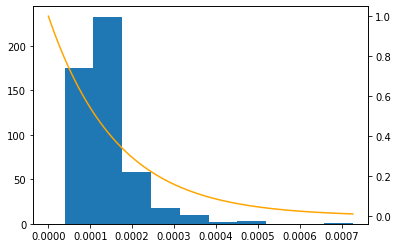

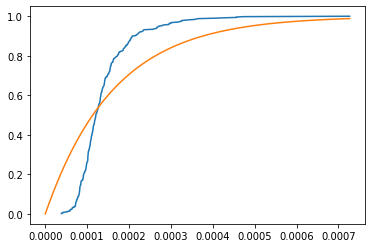

For class 1 in species DM:


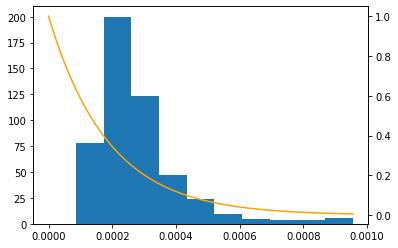

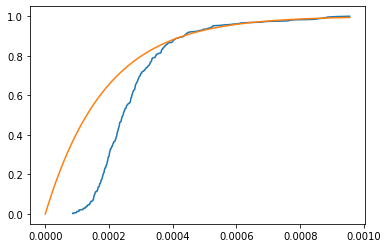

For class 2 in species DM:


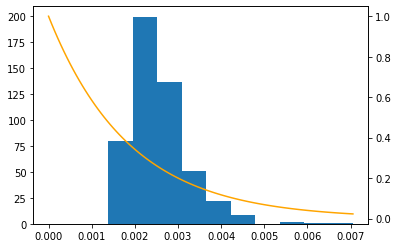

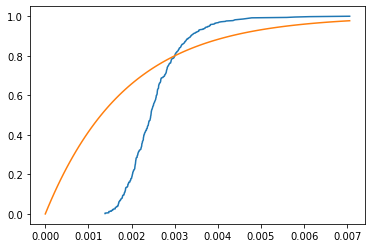

For class 3 in species DM:


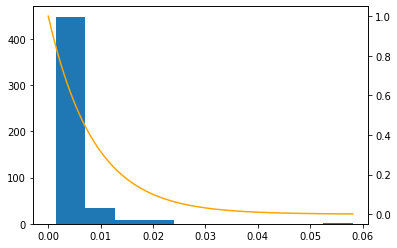

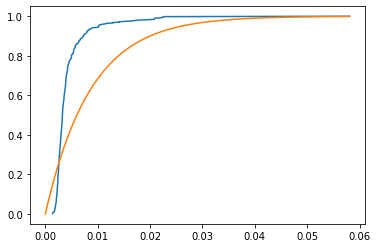

For class 4 in species DM:


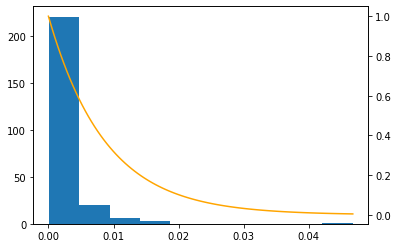

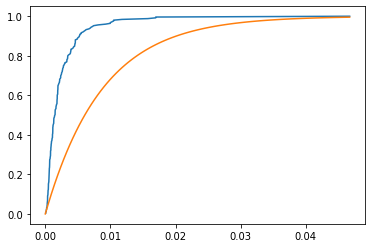

For class 5 in species DM:


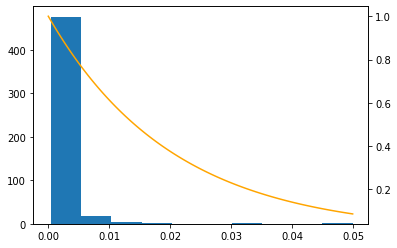

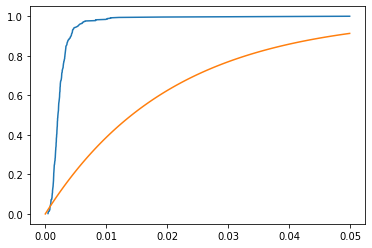

For class 6 in species DM:


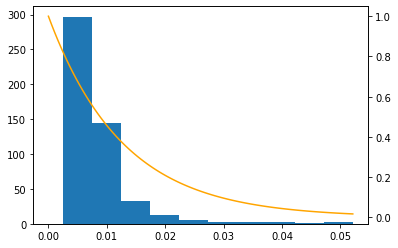

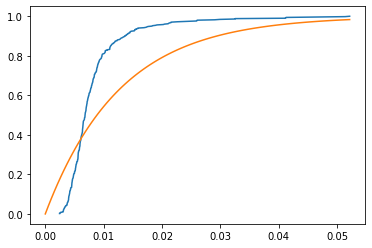

For class 7 in species DM:


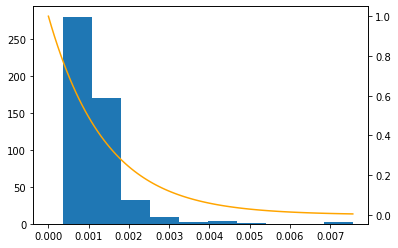

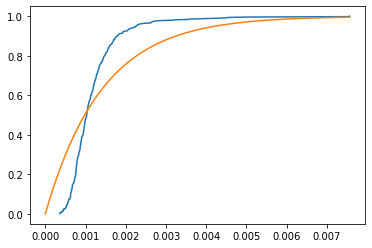

For class 0 in species EC:


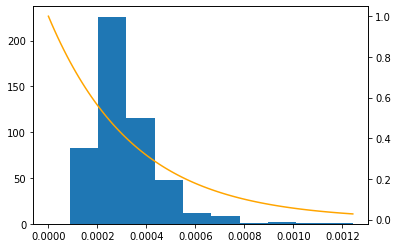

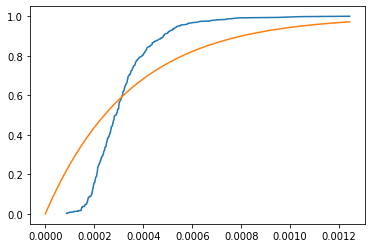

For class 1 in species EC:


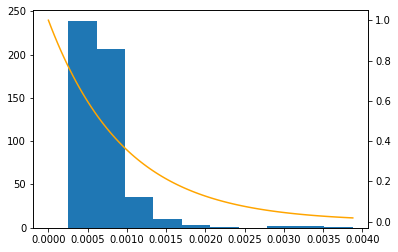

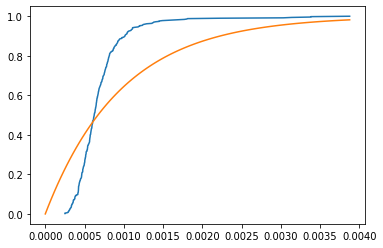

For class 2 in species EC:


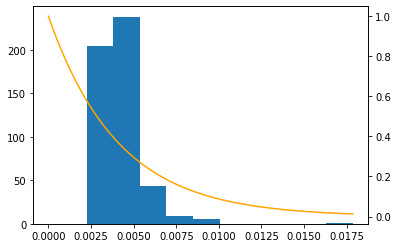

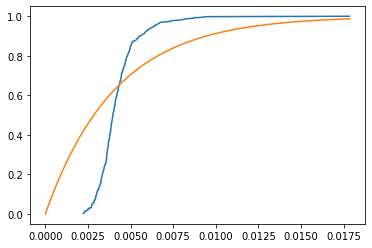

For class 3 in species EC:


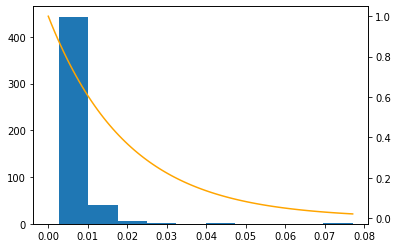

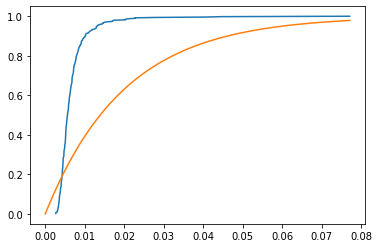

For class 4 in species EC:
For class 5 in species EC:


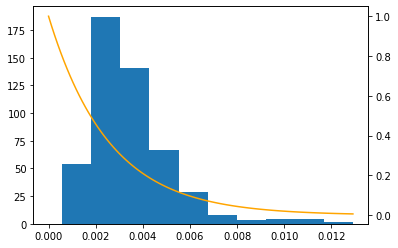

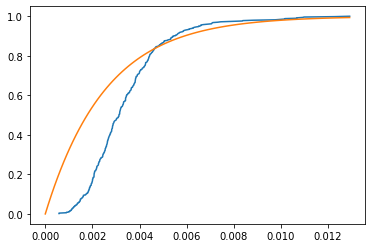

For class 6 in species EC:


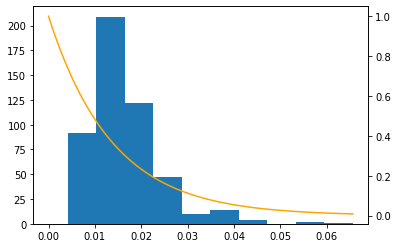

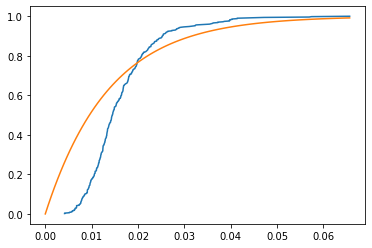

For class 7 in species EC:


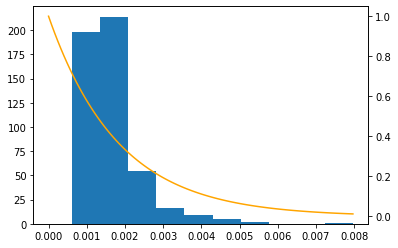

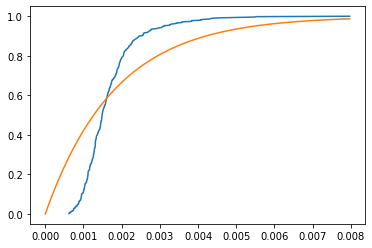

For class 0 in species MM:


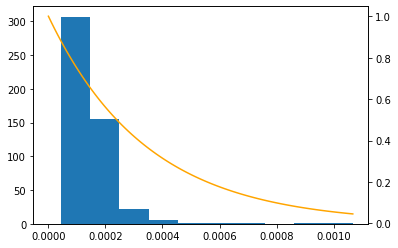

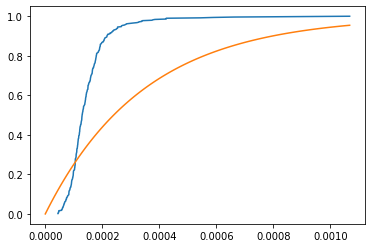

For class 1 in species MM:


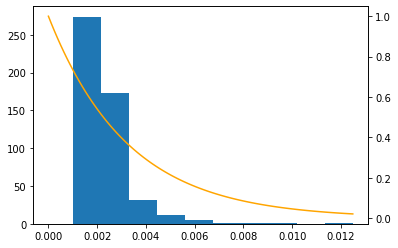

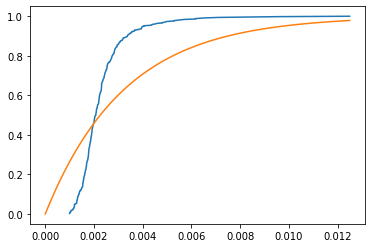

For class 2 in species MM:


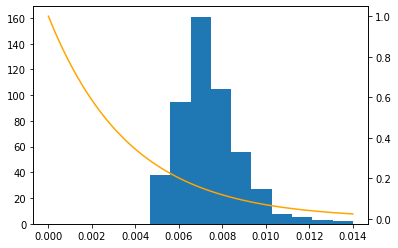

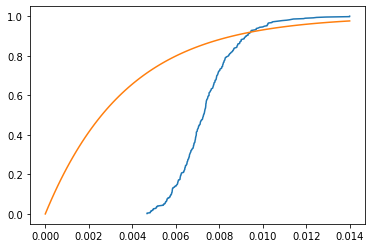

For class 3 in species MM:


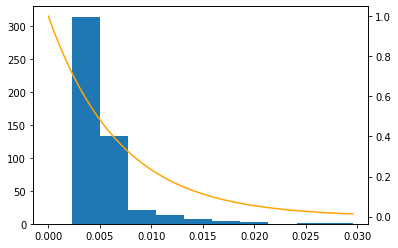

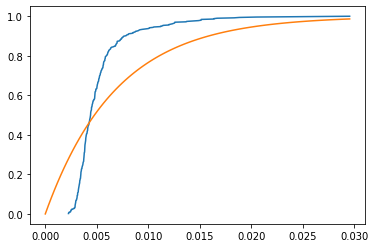

For class 4 in species MM:


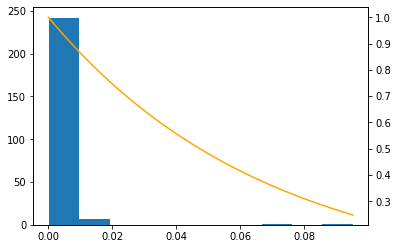

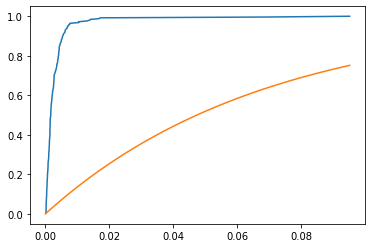

For class 5 in species MM:


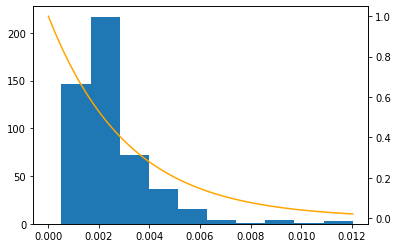

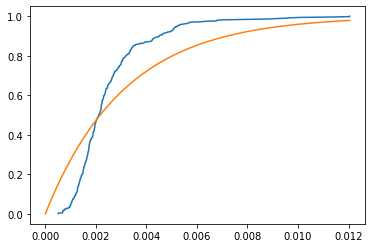

For class 6 in species MM:


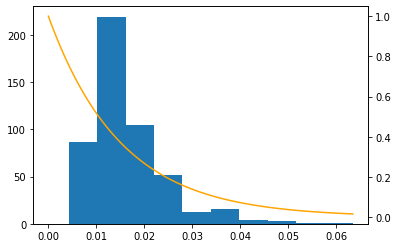

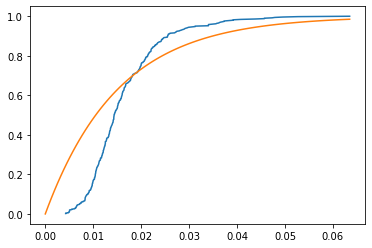

For class 7 in species MM:


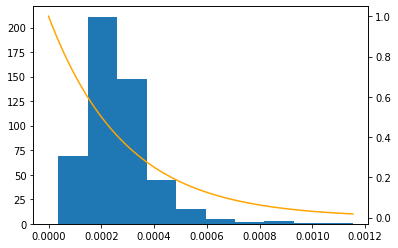

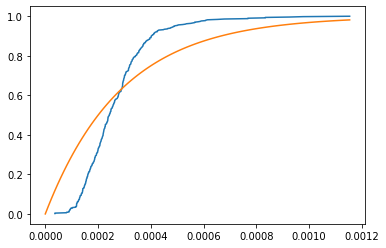

For class 0 in species RN:


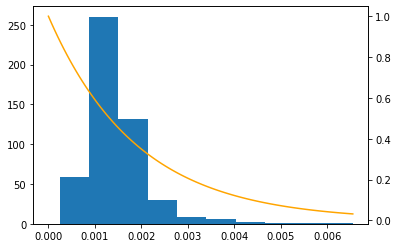

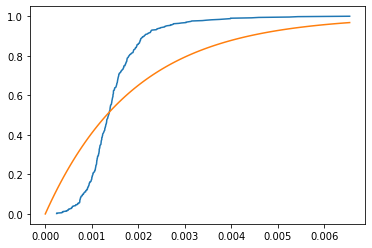

For class 1 in species RN:


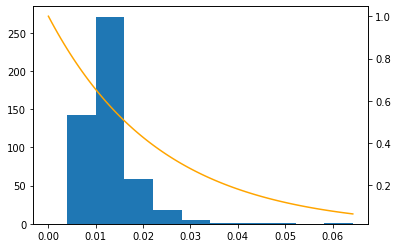

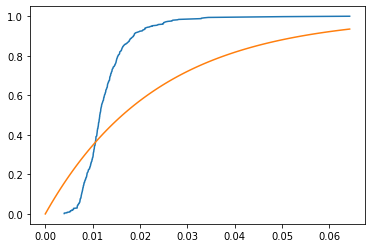

For class 2 in species RN:


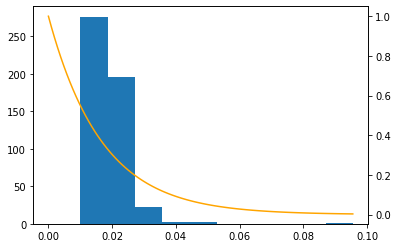

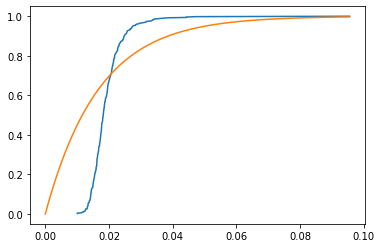

For class 3 in species RN:


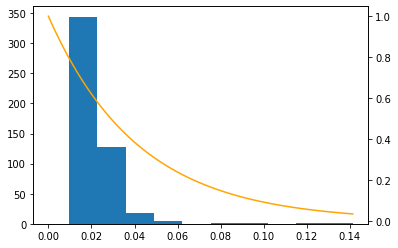

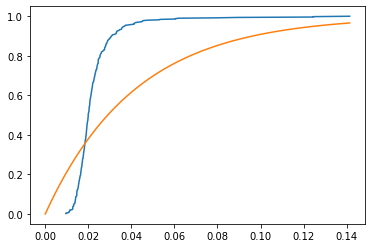

For class 4 in species RN:


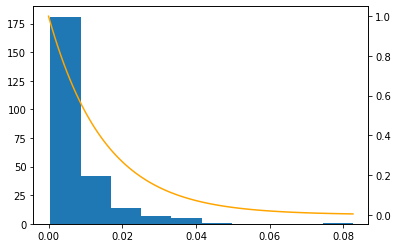

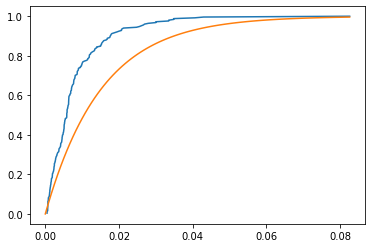

For class 5 in species RN:


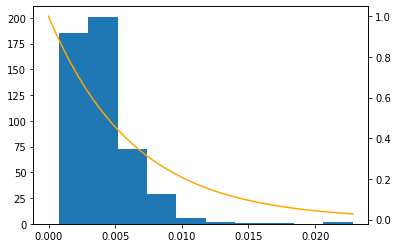

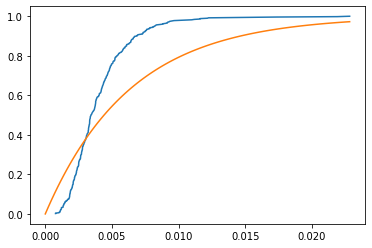

For class 6 in species RN:


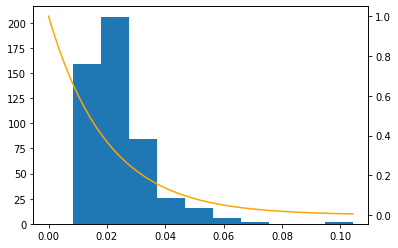

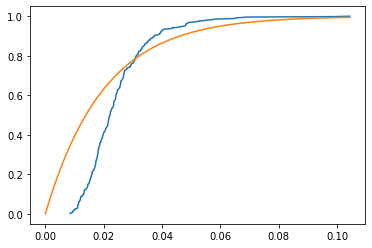

For class 7 in species RN:


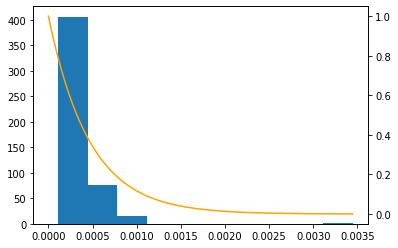

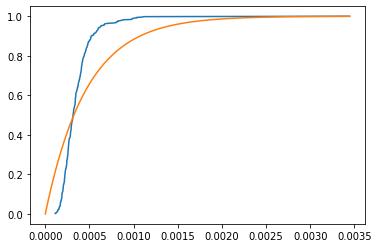

For class 0 in species SC:


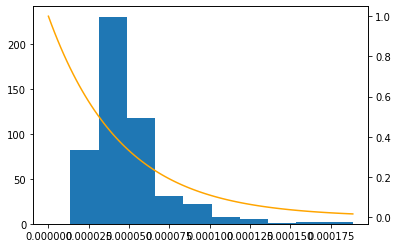

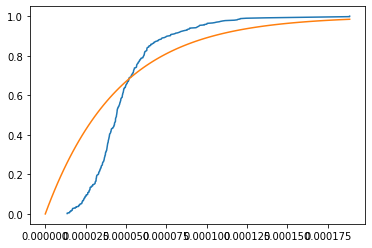

For class 1 in species SC:


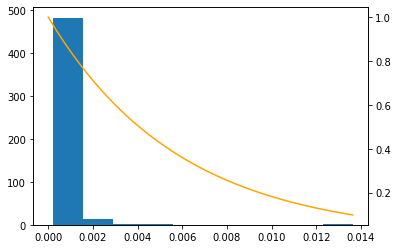

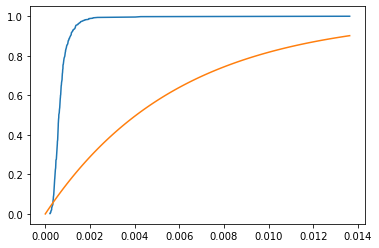

For class 2 in species SC:


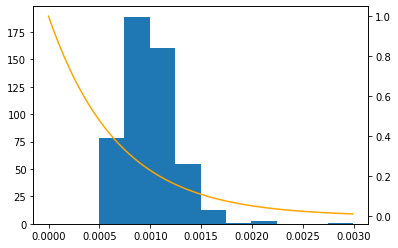

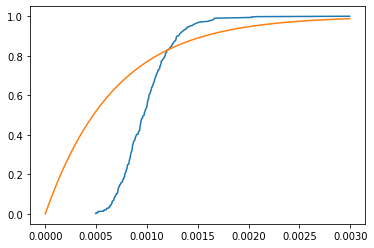

For class 3 in species SC:


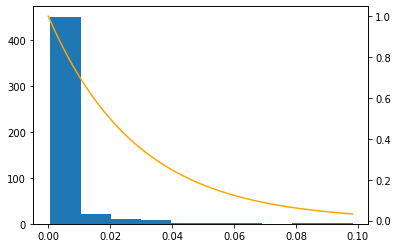

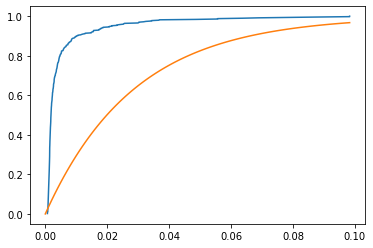

For class 4 in species SC:


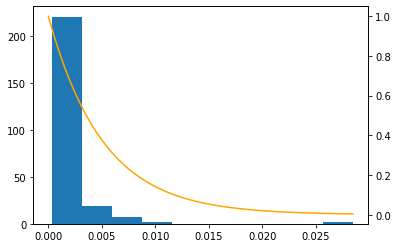

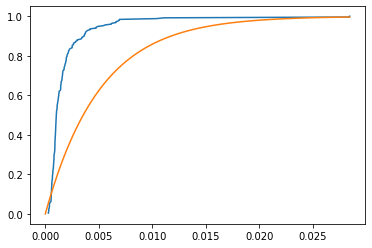

For class 5 in species SC:


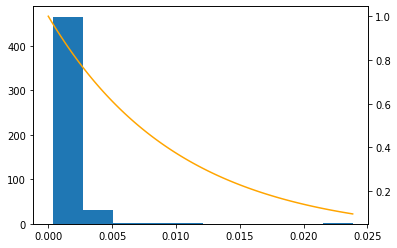

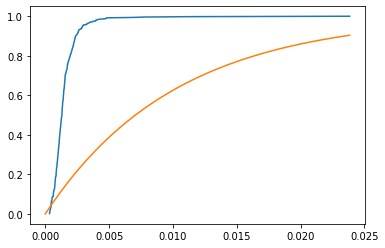

For class 6 in species SC:


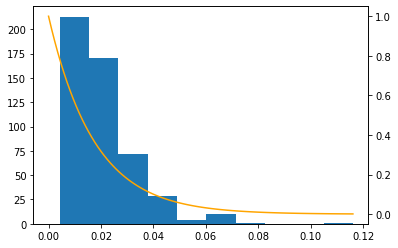

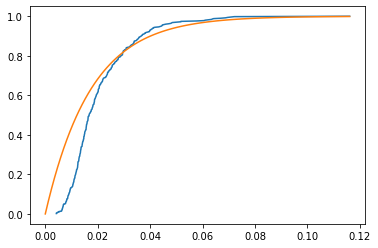

For class 7 in species SC:


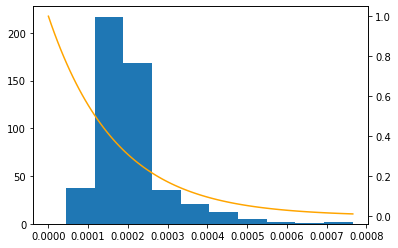

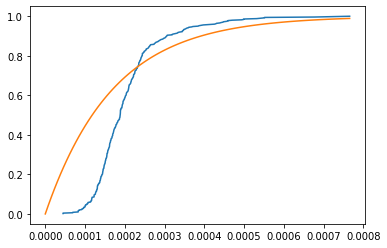

For class 0 in species SP:


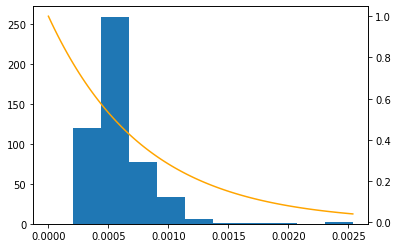

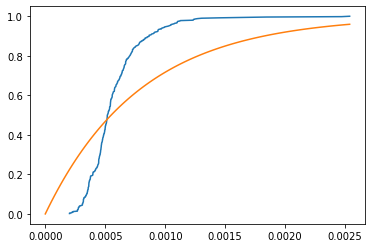

For class 1 in species SP:


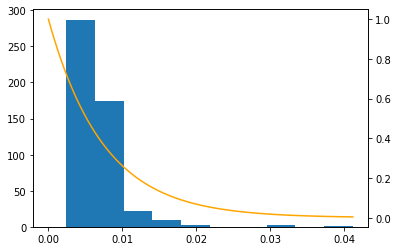

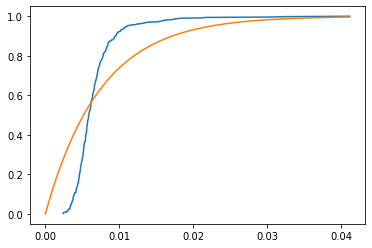

For class 2 in species SP:


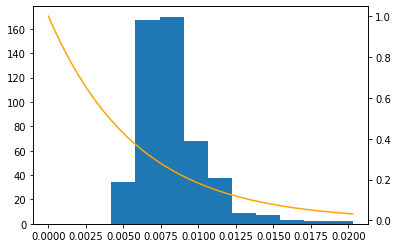

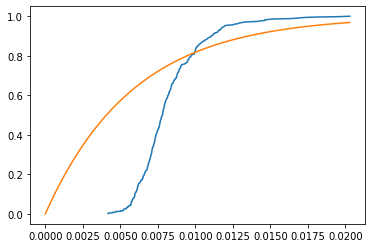

For class 3 in species SP:


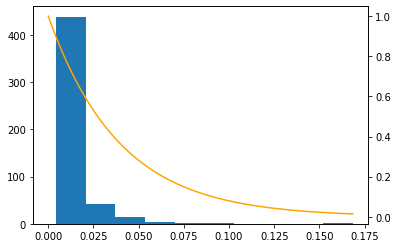

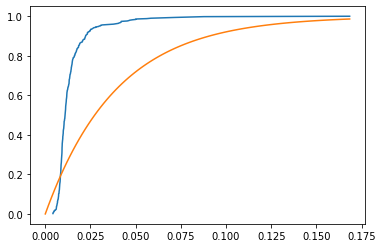

For class 4 in species SP:


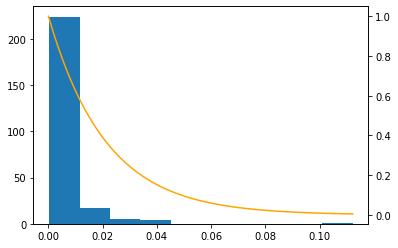

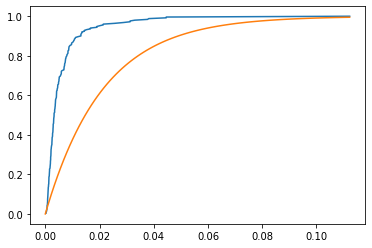

For class 5 in species SP:


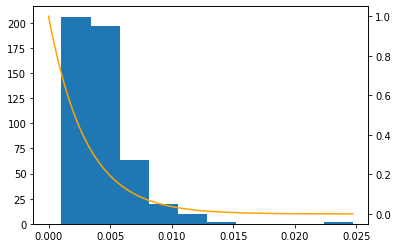

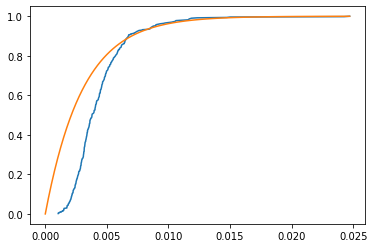

For class 6 in species SP:


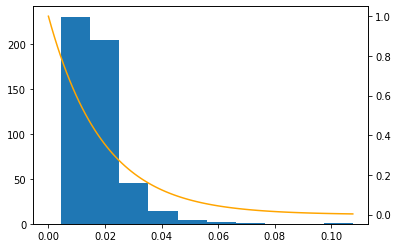

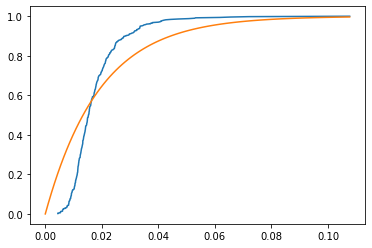

For class 7 in species SP:


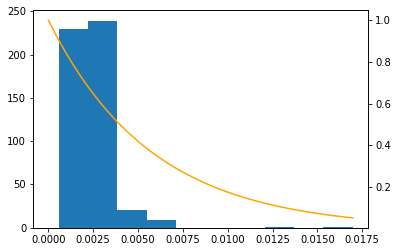

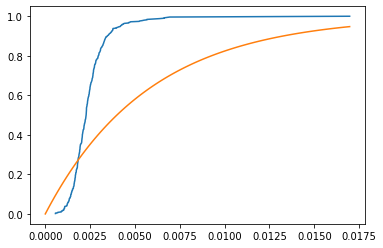

In [130]:
for specie in ["AT","CE", "DM", "EC", "MM", "RN", "SC", "SP"]:
    with open(r"C:\Users\Tim Huang\{}distances.json".format(specie)) as f:
        data  = json.load(f)
        
    for i in data:
        print("For class {} in species {}:".format(i, specie))
        try:
            expofit(data[i][i], cdf = True)
        except:
            pass

For class 0 in species AT:


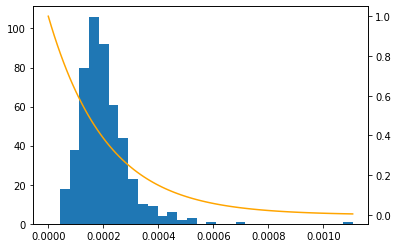

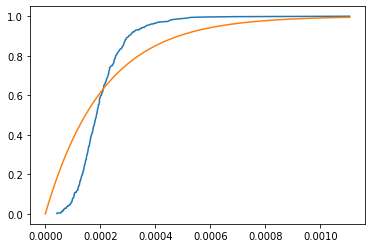

For class 1 in species AT:


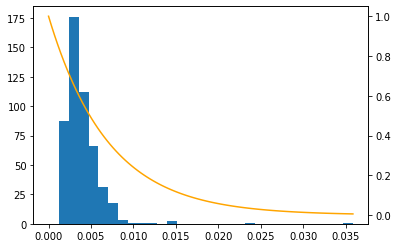

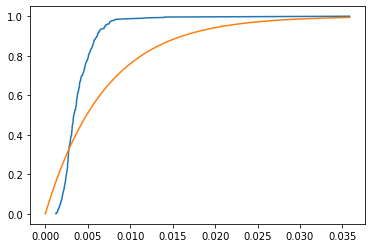

For class 2 in species AT:


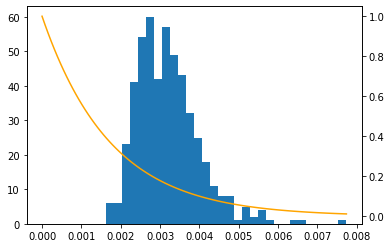

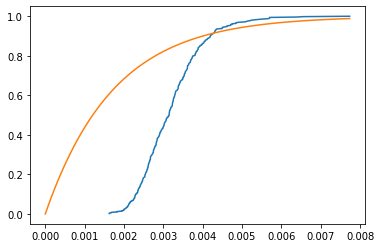

For class 3 in species AT:


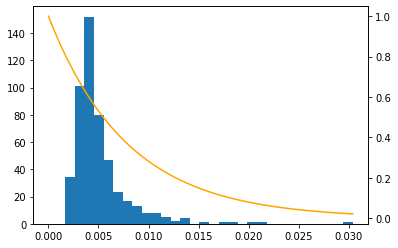

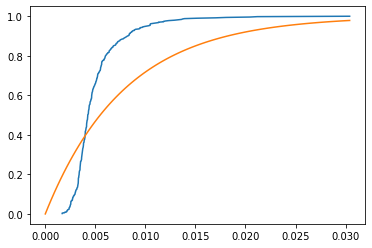

For class 4 in species AT:


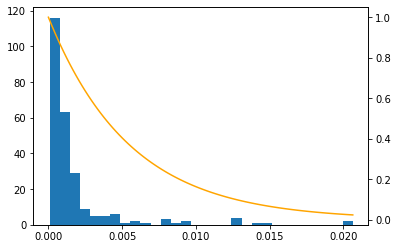

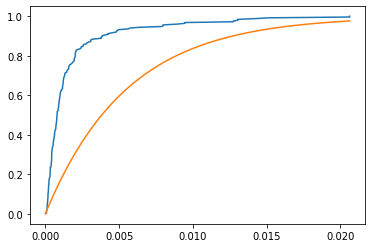

For class 5 in species AT:


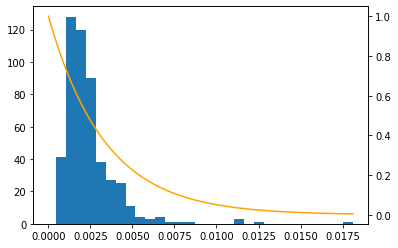

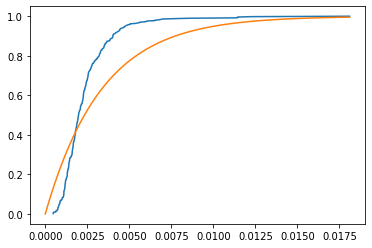

For class 6 in species AT:


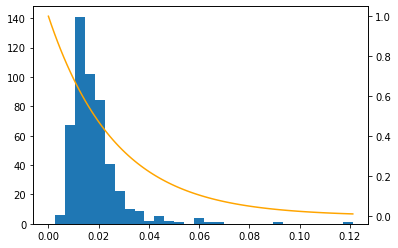

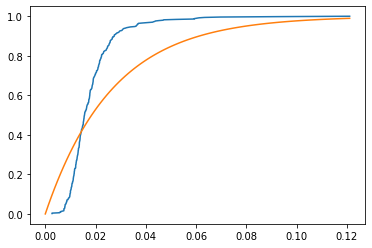

For class 7 in species AT:


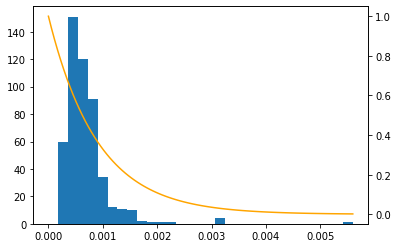

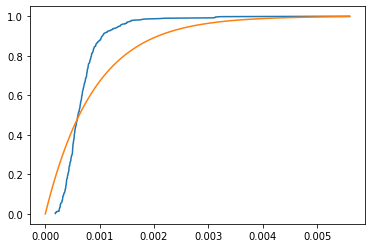

For class 0 in species CE:


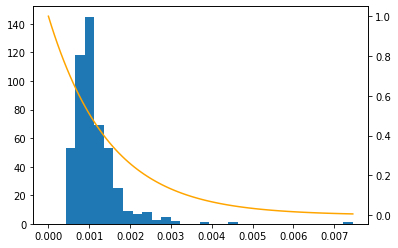

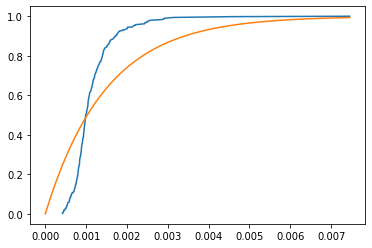

For class 1 in species CE:


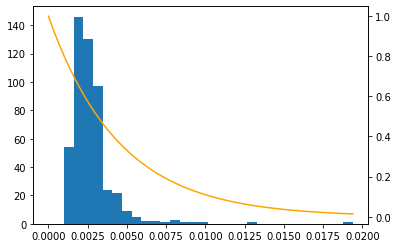

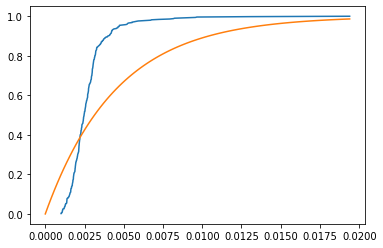

For class 2 in species CE:


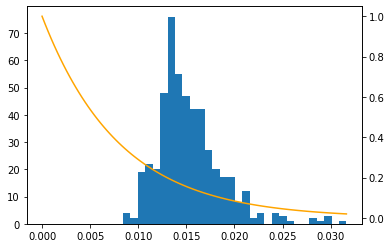

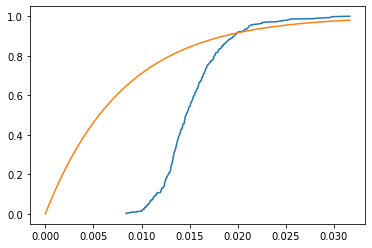

For class 3 in species CE:


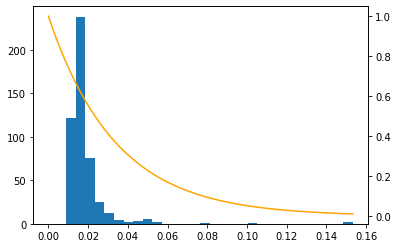

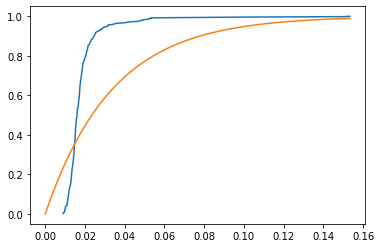

For class 4 in species CE:


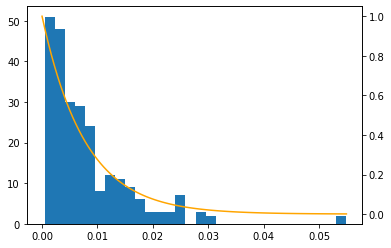

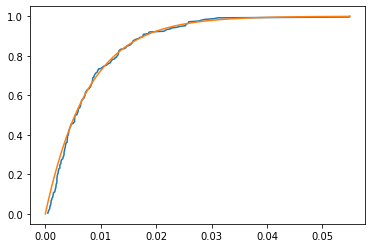

For class 5 in species CE:


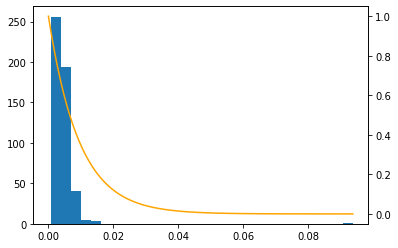

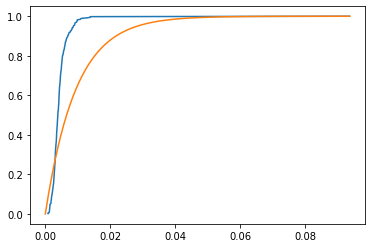

For class 6 in species CE:


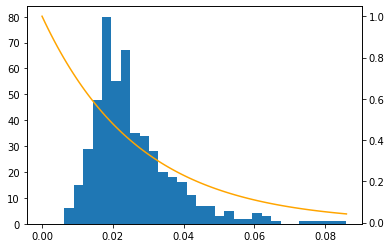

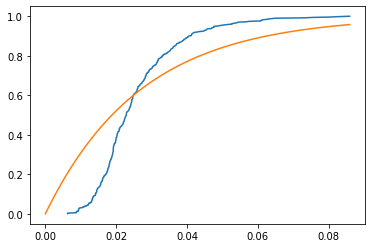

For class 7 in species CE:


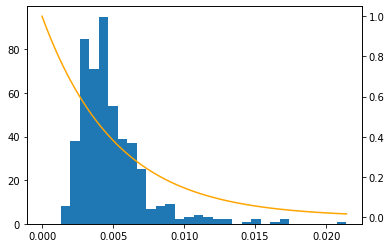

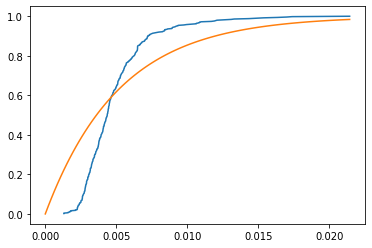

For class 0 in species DM:


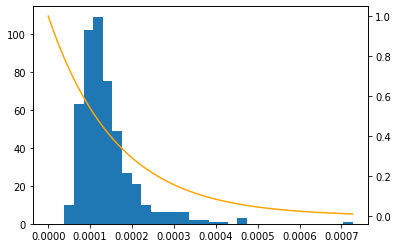

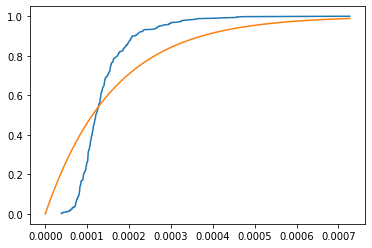

For class 1 in species DM:


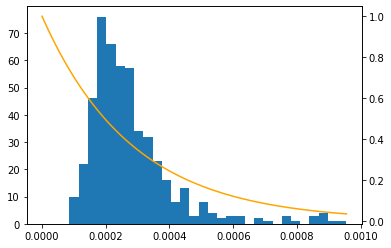

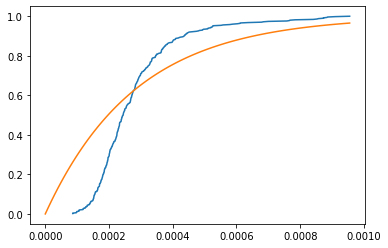

For class 2 in species DM:


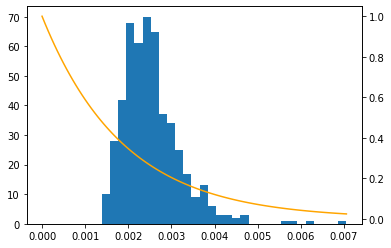

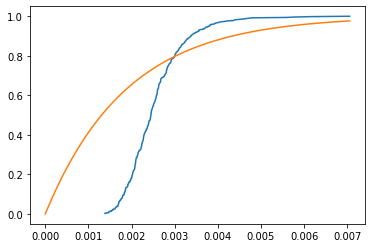

For class 3 in species DM:


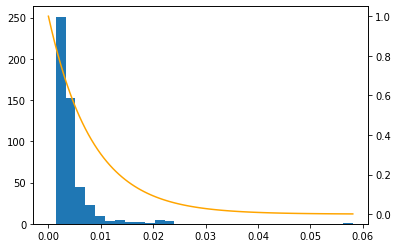

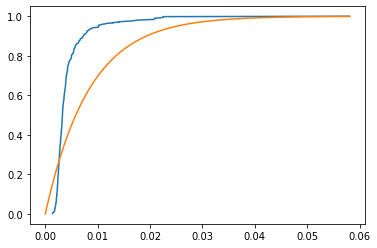

For class 4 in species DM:


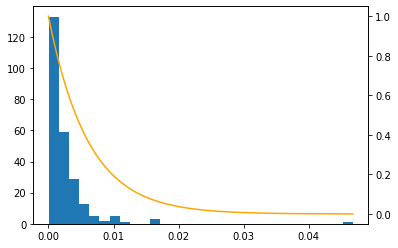

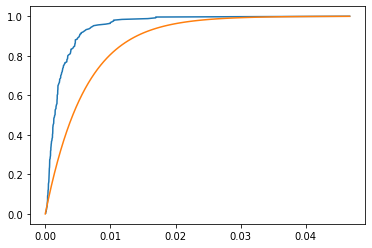

For class 5 in species DM:


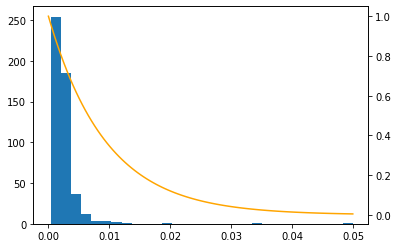

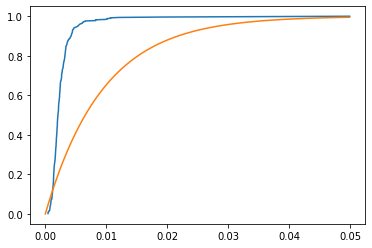

For class 6 in species DM:


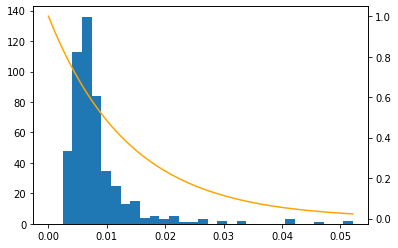

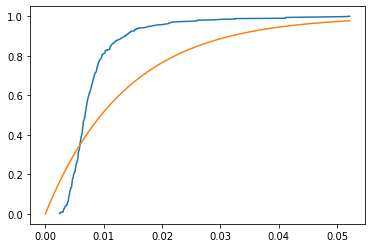

For class 7 in species DM:


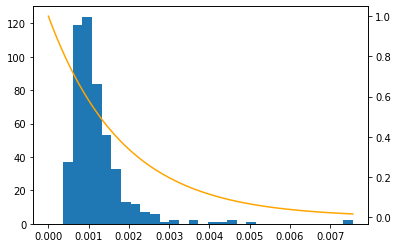

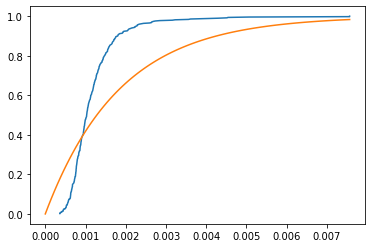

For class 0 in species EC:


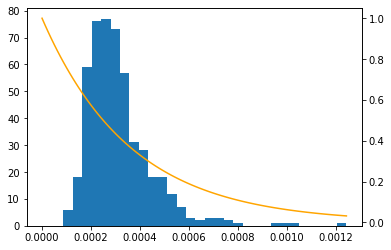

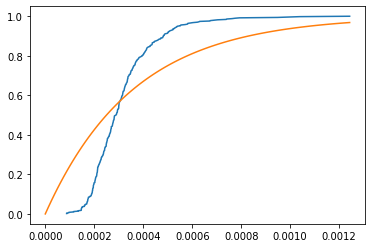

For class 1 in species EC:


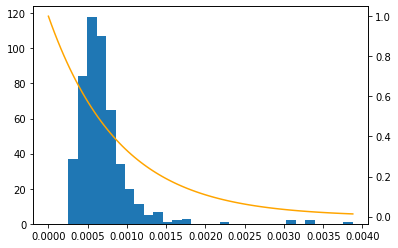

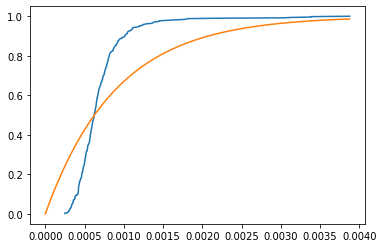

For class 2 in species EC:


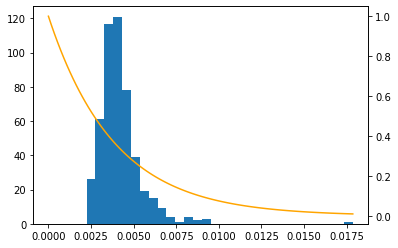

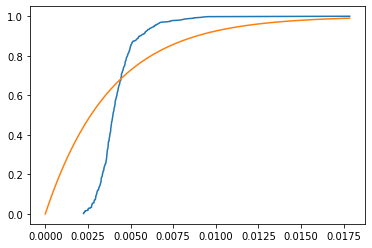

For class 3 in species EC:


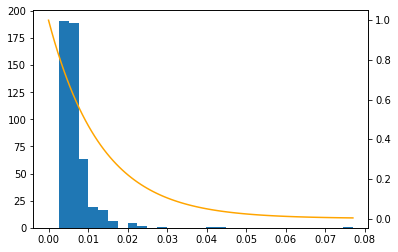

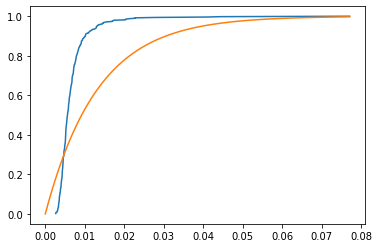

For class 4 in species EC:
For class 5 in species EC:


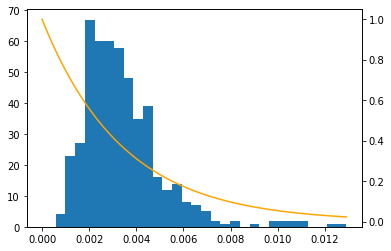

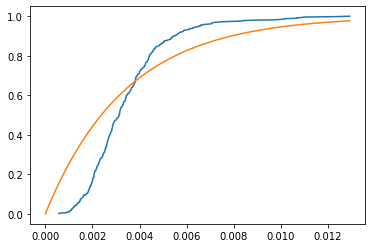

For class 6 in species EC:


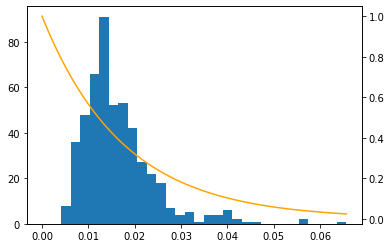

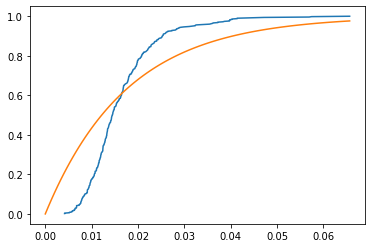

For class 7 in species EC:


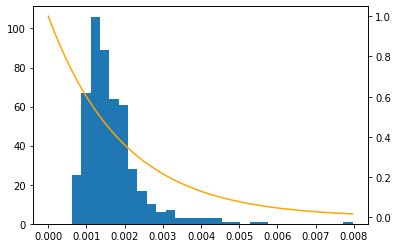

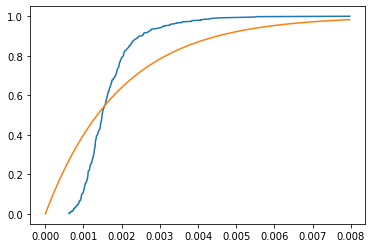

For class 0 in species MM:


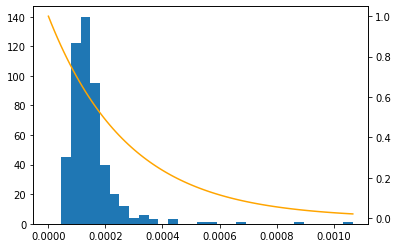

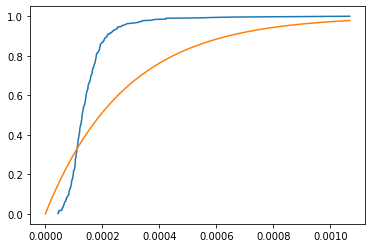

For class 1 in species MM:


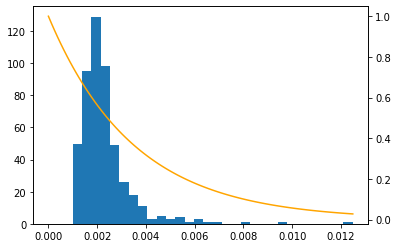

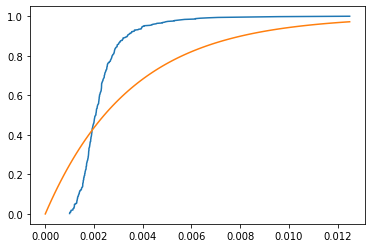

For class 2 in species MM:


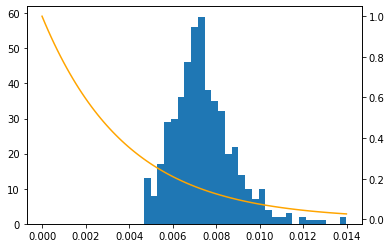

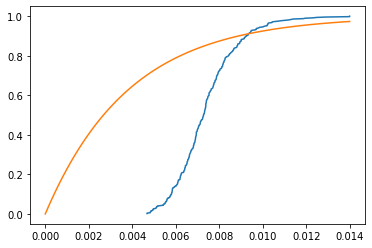

For class 3 in species MM:


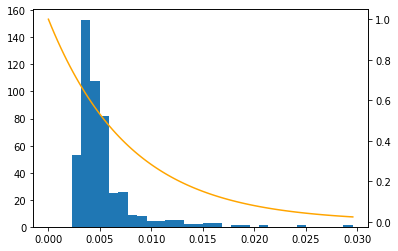

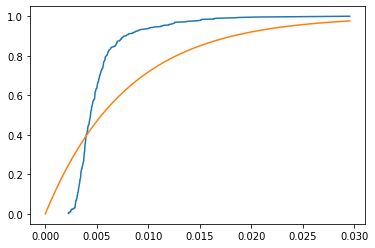

For class 4 in species MM:


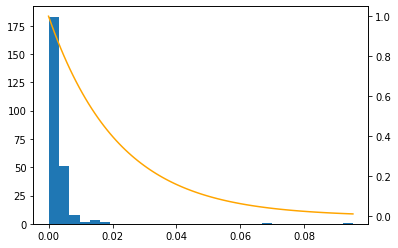

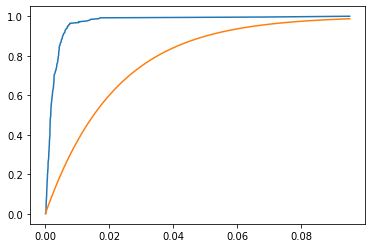

For class 5 in species MM:


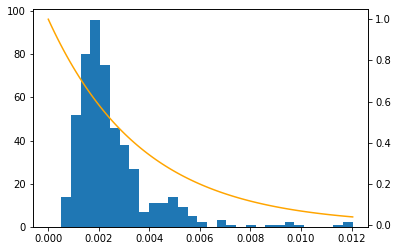

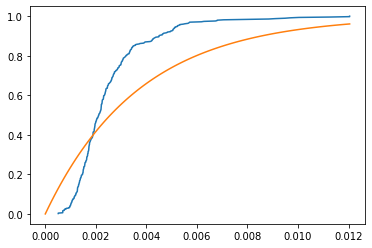

For class 6 in species MM:


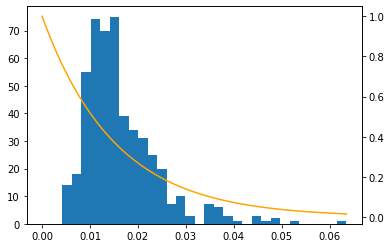

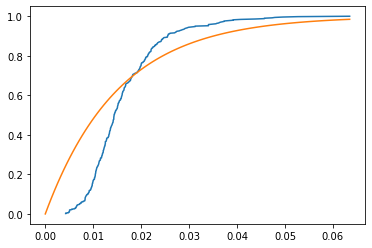

For class 7 in species MM:


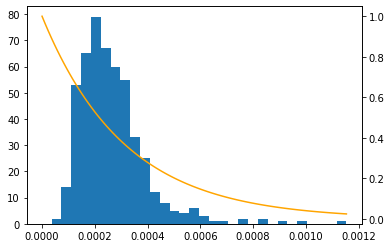

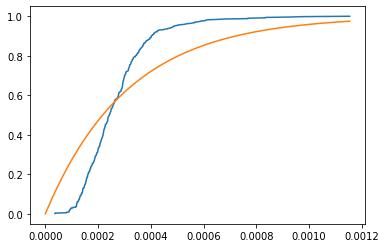

For class 0 in species RN:


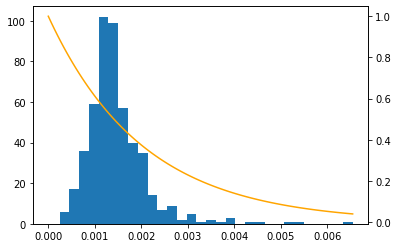

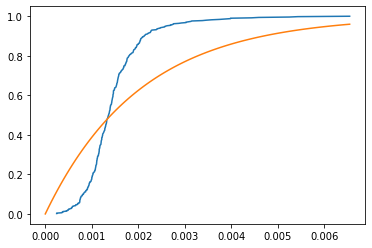

For class 1 in species RN:


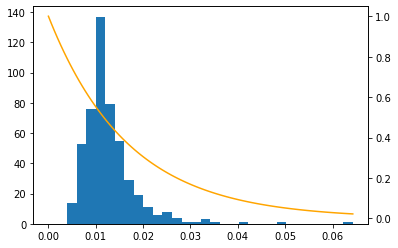

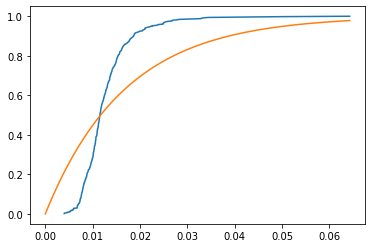

For class 2 in species RN:


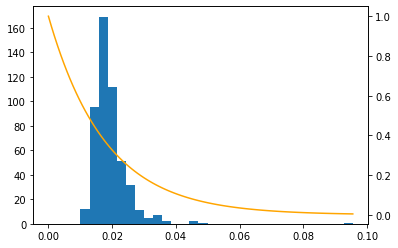

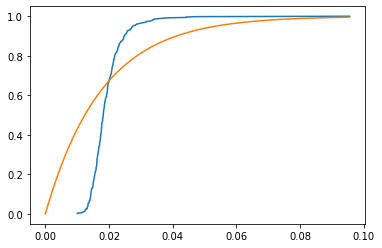

For class 3 in species RN:


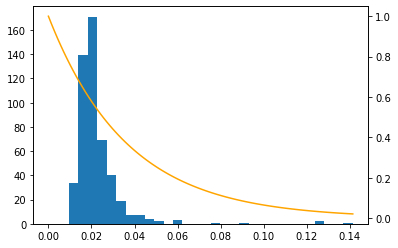

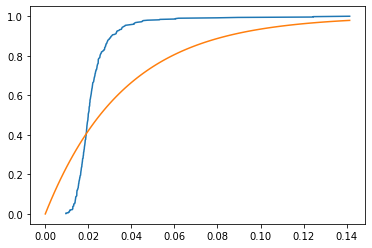

For class 4 in species RN:


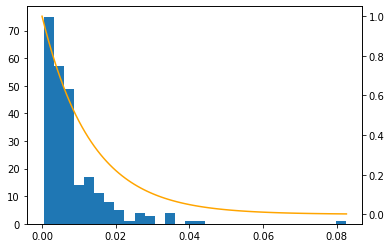

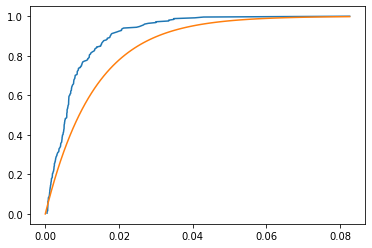

For class 5 in species RN:


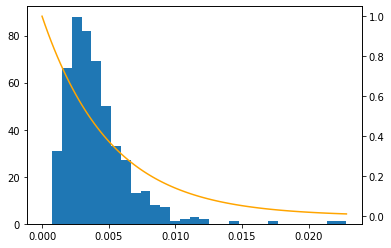

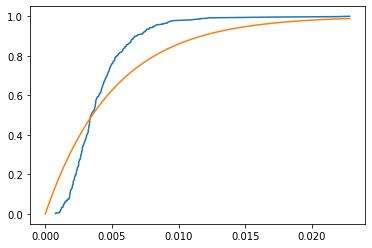

For class 6 in species RN:


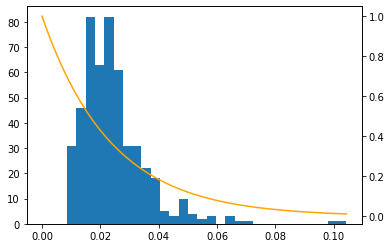

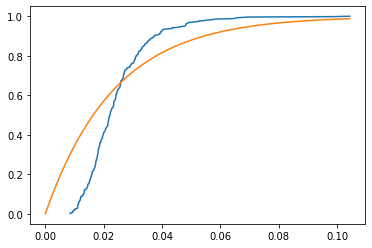

For class 7 in species RN:


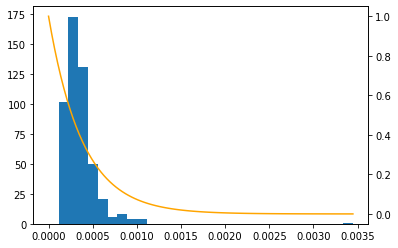

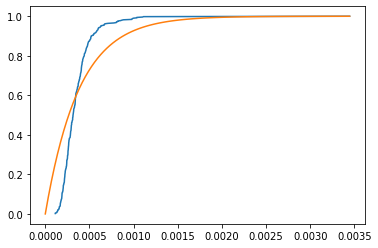

For class 0 in species SC:


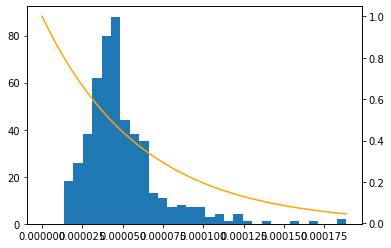

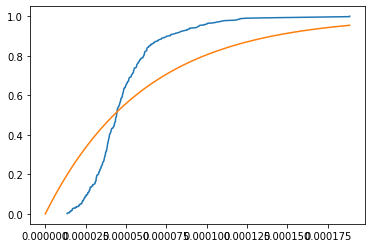

For class 1 in species SC:


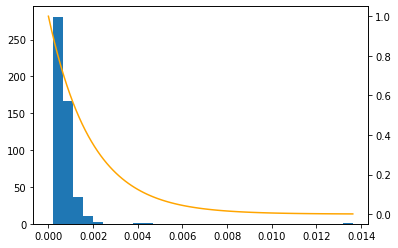

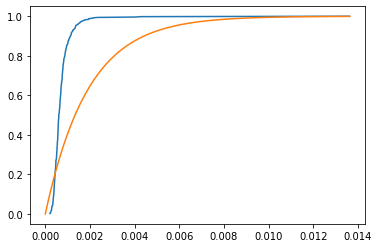

For class 2 in species SC:


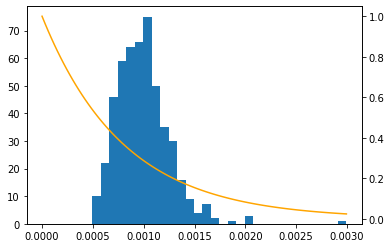

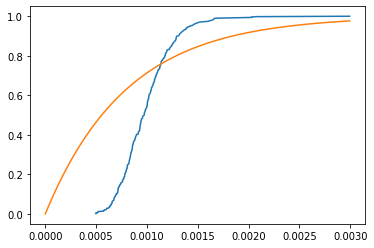

For class 3 in species SC:


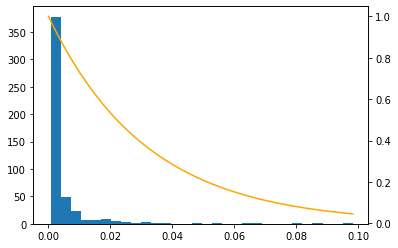

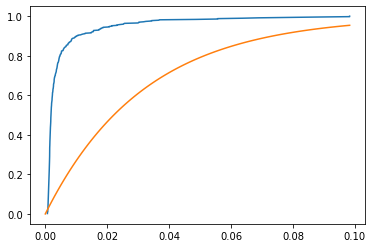

For class 4 in species SC:


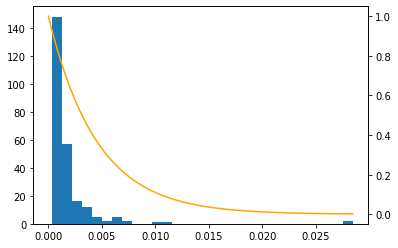

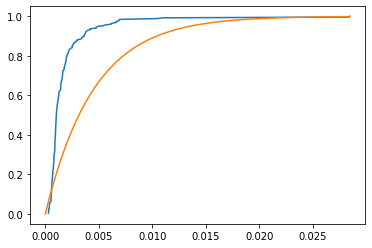

For class 5 in species SC:


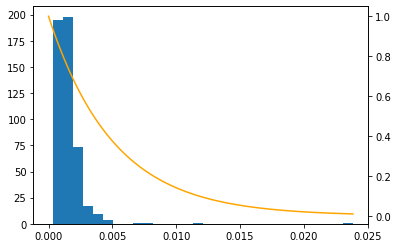

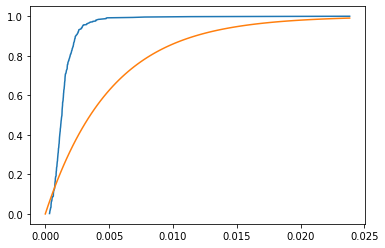

For class 6 in species SC:


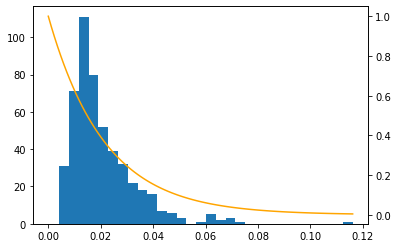

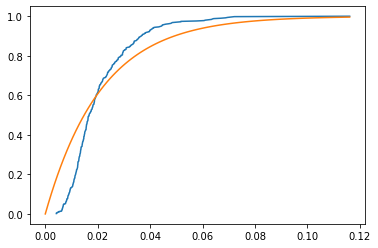

For class 7 in species SC:


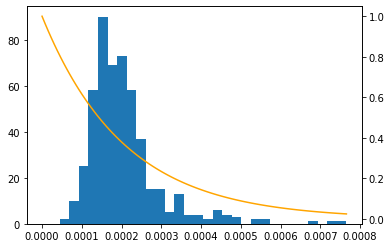

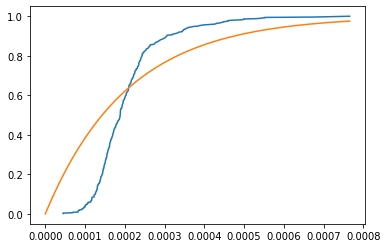

For class 0 in species SP:


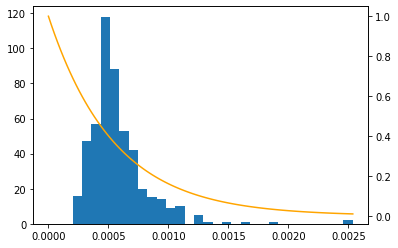

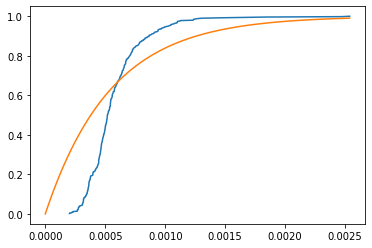

For class 1 in species SP:


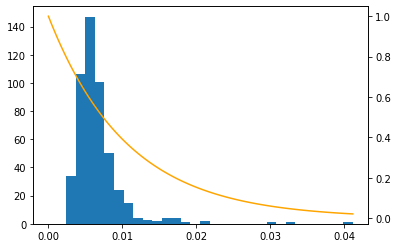

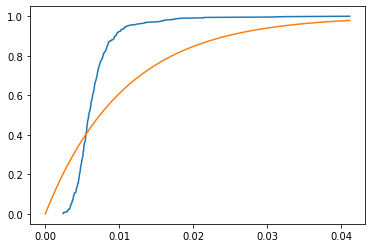

For class 2 in species SP:


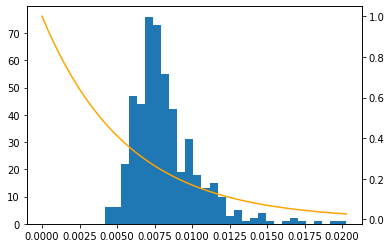

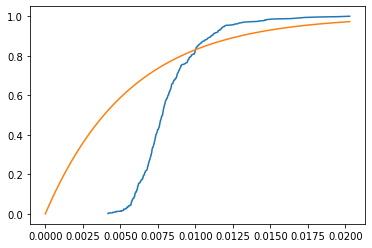

For class 3 in species SP:


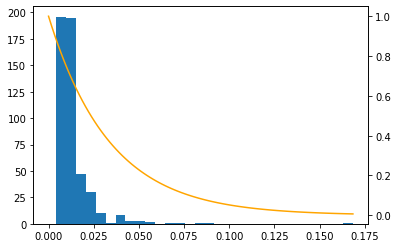

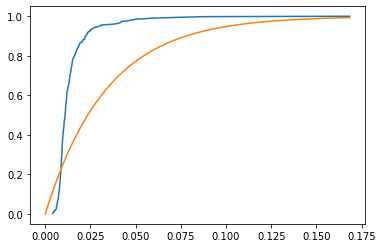

For class 4 in species SP:


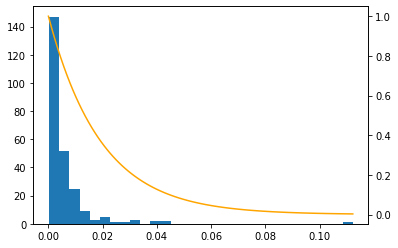

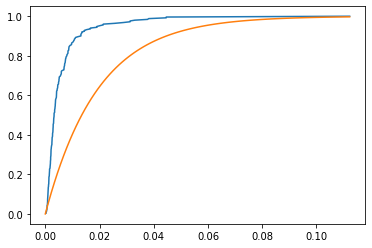

For class 5 in species SP:


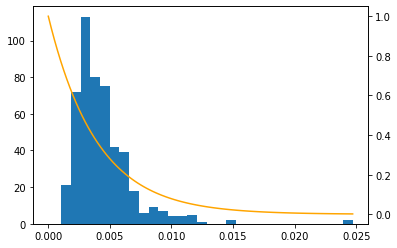

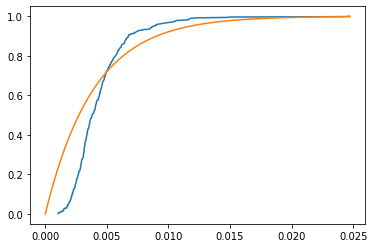

For class 6 in species SP:


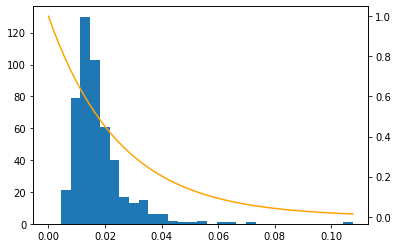

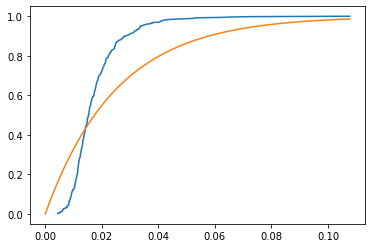

For class 7 in species SP:


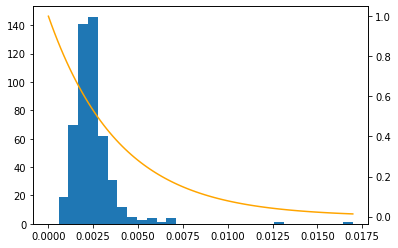

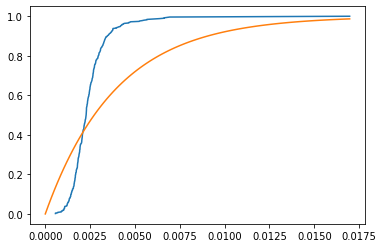

In [18]:
for specie in ["AT","CE", "DM", "EC", "MM", "RN", "SC", "SP"]:
    with open(r"C:\Users\Tim Huang\{}distances.json".format(specie)) as f:
        data  = json.load(f)
        
    for i in data:
        print("For class {} in species {}:".format(i, specie))
        try:
            expofit(data[i][i],buckets = 30, cdf = True, start_factor = 2.5)
        except:
            pass